In [109]:

import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv')

In [110]:
column_names = df.columns
df.shape

(4008, 11)

In [111]:
#columns appear to be categorical: ST Gender Education Policy type Vehicle Class
cols = []
for colname in df.columns:
    cols.append(colname.lower())
df.columns = cols
df.columns

Index(['customer', 'st', 'gender', 'education', 'customer lifetime value',
       'income', 'monthly premium auto', 'number of open complaints',
       'policy type', 'vehicle class', 'total claim amount'],
      dtype='object')

In [112]:
# Replace white spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')
# Replace 'st' with 'state' in column names
df= df.rename({'st': 'state'}, axis=1)
df.columns

Index(['customer', 'state', 'gender', 'education', 'customer_lifetime_value',
       'income', 'monthly_premium_auto', 'number_of_open_complaints',
       'policy_type', 'vehicle_class', 'total_claim_amount'],
      dtype='object')

In [113]:
df

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
df.dtypes

customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value       object
income                       float64
monthly_premium_auto         float64
number_of_open_complaints     object
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

In [115]:
# Clean Gender column
char_to_replace = {"femal": 'F', 'male': 'M', "female": "F", "Fe": "F", "Fmal": "F", "Male": "M"}

# Iterate over all key-value pairs in dictionary 
for key, value in char_to_replace.items():
    # Replace key character with value character in string
    df['gender'] = df['gender'].str.replace(key, value)

# Clean State column
df['state'].value_counts()
state_mapping = {'AZ': 'Arizona','Californiaforniaforniaforniafornia': 'California',  'Californiaforniaforniaforniaforniafornia': 'California', 'Cali': 'California', 'Californiafornia': 'California', 'WA': 'Washington'}
for key, value in state_mapping.items():
    # Replace key character with value character in string
    df['state'] = df['state'].str.replace(key, value)

# Clean education column
df['education'].value_counts()
df["education"] = df['education'].str.replace("Bachelors", "Bachelor")

# Clean Customer Lifetime Value column
df['customer_lifetime_value'] = df['customer_lifetime_value'].str.rstrip('%')

# Clean Vehicle Class column
vehicle_class_mapping = {'Sports Car': 'Luxury', 'Luxury SUV': 'Luxury', 'Luxury Car': 'Luxury'}

# Iterate over all key-value pairs in dictionary 
for key, value in vehicle_class_mapping.items():
    # Replace key character with value character in string
    df['vehicle_class'] = df['vehicle_class'].str.replace(key, value)
# df['vehicle_class'].value_counts()
# df

In [116]:
# Customer lifetime value should be numeric
df['customer_lifetime_value'] = pd.to_numeric(df['customer_lifetime_value'], errors='coerce')
df['customer_lifetime_value'] = df['customer_lifetime_value'].astype(float)
print(df.dtypes)

# Number of open complaints has an incorrect format.
df["number_of_open_complaints"].value_counts()
# Extract the number of open complaints from each entry and calculate the middle value

df['number_of_open_complaints'] = df['number_of_open_complaints'].str.split('/').str[1]

# Cast the column to the proper numeric type
df['number_of_open_complaints'] = pd.to_numeric(df['number_of_open_complaints'], errors='coerce')
df['number_of_open_complaints'] = df['number_of_open_complaints'].astype(float)
print(df.dtypes)


customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto         float64
number_of_open_complaints     object
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object
customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto         float64
number_of_open_complaints    float64
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object


In [117]:
df["number_of_open_complaints"].value_counts()

number_of_open_complaints
0.0    830
1.0    138
2.0     50
3.0     34
4.0     13
5.0      6
Name: count, dtype: int64

In [118]:
# Step 1: Identify columns with null values and calculate the number of null values
df.isna().sum()


round(df.isna().sum()/len(df),4)*100  # shows the percentage of null values in a column
nulls_df = pd.DataFrame(round(df.isna().sum()/len(df),4)*100)
nulls_df
nulls_df = nulls_df.reset_index()
nulls_df
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df


# Step 2: Implement the strategy to handle null values
# Fill null values with column mean for numerical variables

column_categorical=["state", "gender", "education", "policy_type", "vehicle_class"]
column_numerical=["income", "monthly_premium_auto", "total_claim_amount", "customer_lifetime_value", "number_of_open_complaints"]

numerical_columns = df.select_dtypes(include=['number']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

df.isna().sum()


customer                     0
state                        0
gender                       0
education                    0
customer_lifetime_value      0
income                       0
monthly_premium_auto         0
number_of_open_complaints    0
policy_type                  0
vehicle_class                0
total_claim_amount           0
dtype: int64

In [119]:

# Step 1: Identify duplicate rows
duplicates = df.duplicated()
print(df.shape)
df= df.drop_duplicates(keep='first') #to not lose more data, I prefer to keep the first duplicate.
df = df.reset_index(drop=True)
print(df.shape)

(4008, 11)
(1072, 11)


In [120]:
# Step 6: Save the cleaned dataset to a new CSV file
df.to_csv('cleaned_dataset.csv', index=False)

# Print the cleaned DataFrame
print("Cleaned DataFrame:")
print(df)


Cleaned DataFrame:
     customer       state gender             education  \
0     RB50392  Washington      F                Master   
1     QZ44356     Arizona      F              Bachelor   
2     AI49188      Nevada      F              Bachelor   
3     WW63253  California      M              Bachelor   
4     GA49547  Washington      M  High School or Below   
...       ...         ...    ...                   ...   
1067  VJ51327  California      F  High School or Below   
1068  GS98873     Arizona      F              Bachelor   
1069  CW49887  California      F                Master   
1070  MY31220  California      F               College   
1071  AA71604  California      F              Bachelor   

      customer_lifetime_value        income  monthly_premium_auto  \
0                7.936903e+05      0.000000            1000.00000   
1                6.979536e+05      0.000000              94.00000   
2                1.288743e+06  48767.000000             108.00000   
3       

In [121]:
summary = df.describe().T
def roundforme(x):
    return round(x,2)

summary['mean'] = list(map(roundforme, summary['mean']))

# summary
for col in summary.columns:
    summary[col] = summary[col].apply(lambda x : round(x, 2))
summary

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,1072.0,793690.26,642275.65,200435.07,405405.10,588834.55,893767.48,5816655.35
income,1072.0,39295.70,30455.20,0.00,14072.00,36295.50,64625.50,99960.00
monthly_premium_auto,1072.0,193.23,1600.44,61.00,68.00,83.00,110.00,35354.00
number_of_open_complaints,1072.0,0.39,0.88,0.00,0.00,0.00,0.00,5.00
total_claim_amount,1072.0,404.99,292.89,0.38,202.51,354.96,532.80,2893.24


In [122]:
df.head()

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,F,Master,7.936903e+05,0.0,1000.0,0.0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,6.979536e+05,0.0,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1.288743e+06,48767.0,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,7.645862e+05,0.0,106.0,0.0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,5.363077e+05,36357.0,68.0,0.0,Personal Auto,Four-Door Car,17.269323


In [123]:
df.dtypes

customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto         float64
number_of_open_complaints    float64
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

In [124]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,1072.0,793690.259345,642275.645843,200435.070000,405405.100000,588834.555000,893767.4825,5.816655e+06
income,1072.0,39295.701214,30455.198983,0.000000,14072.000000,36295.500000,64625.5000,9.996000e+04
monthly_premium_auto,1072.0,193.234360,1600.442673,61.000000,68.000000,83.000000,110.0000,3.535400e+04
number_of_open_complaints,1072.0,0.394024,0.883357,0.000000,0.000000,0.000000,0.0000,5.000000e+00
total_claim_amount,1072.0,404.986909,292.890427,0.382107,202.509051,354.964564,532.8000,2.893240e+03


In [125]:
df.describe(include='object').T

,count,unique,top,freq
customer,1072,1071,AA71604,2
state,1072,5,California,332
gender,1072,2,F,620
education,1072,5,Bachelor,332
policy_type,1072,3,Personal Auto,781
vehicle_class,1072,4,Four-Door Car,577


In [126]:
import scipy.stats as stats

In [127]:
df['gender'].value_counts()

gender
F    620
M    452
Name: count, dtype: int64

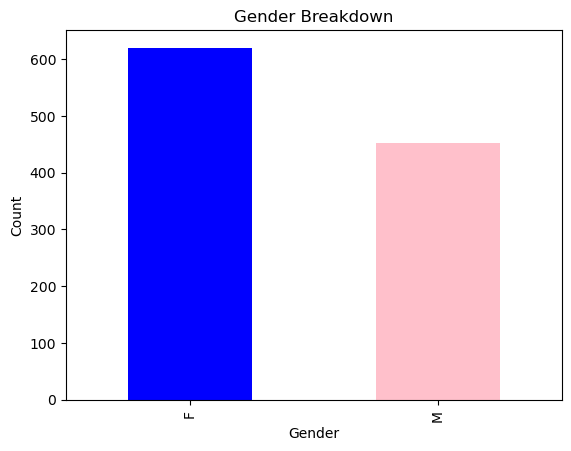

In [128]:
#!pip3 install seaborn if you need to
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
# Task 3: Show a plot of the Gender breakdown
gender_counts = df['gender'].value_counts()
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Gender Breakdown')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
#The number of females is higher than males with over 620 F comparing to 452 M

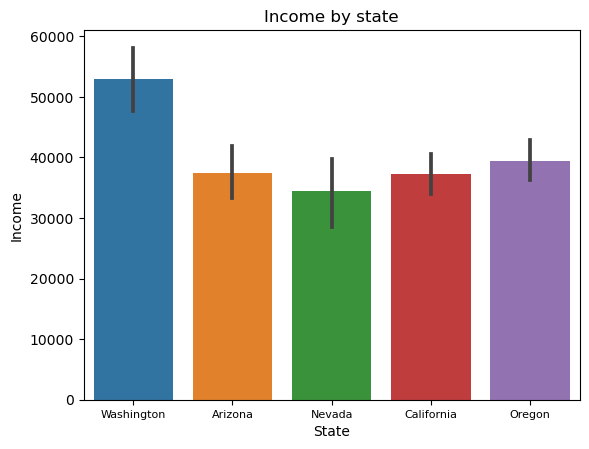

In [131]:
# everything can be a bar chart, but that is a sad sad world
sns.barplot(x="state", y="income", data=df)

# Adjust the font size of the state value labels
plt.xticks(fontsize=8) 
plt.title('Income by state')
plt.xlabel('State')
plt.ylabel('Income')
plt.show()
# individuals in Washington make more income than any other place while Nevada makes the least 

In [130]:
df['state'].value_counts()

state
California    332
Oregon        320
Arizona       211
Washington    111
Nevada         98
Name: count, dtype: int64

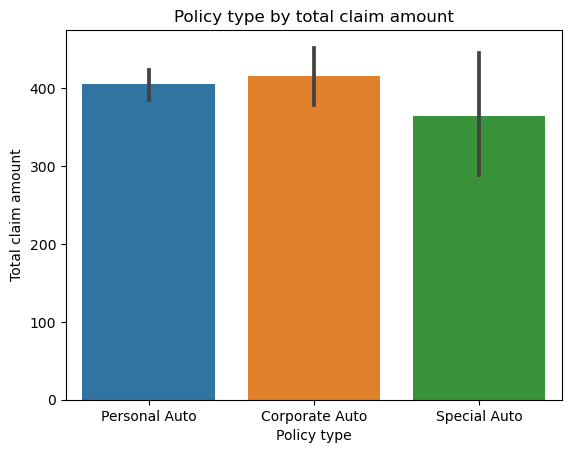

In [134]:
# everything can be a bar chart, but that is a sad sad world
sns.barplot(x="policy_type", y="total_claim_amount", data=df)

# Adjust the font size of the state value labels
plt.xticks(fontsize=10) 
plt.title('Policy type by total claim amount')
plt.xlabel('Policy type')
plt.ylabel('Total claim amount')
plt.show()
 # People with corporate autos have total claim the most and spacial autos has the least

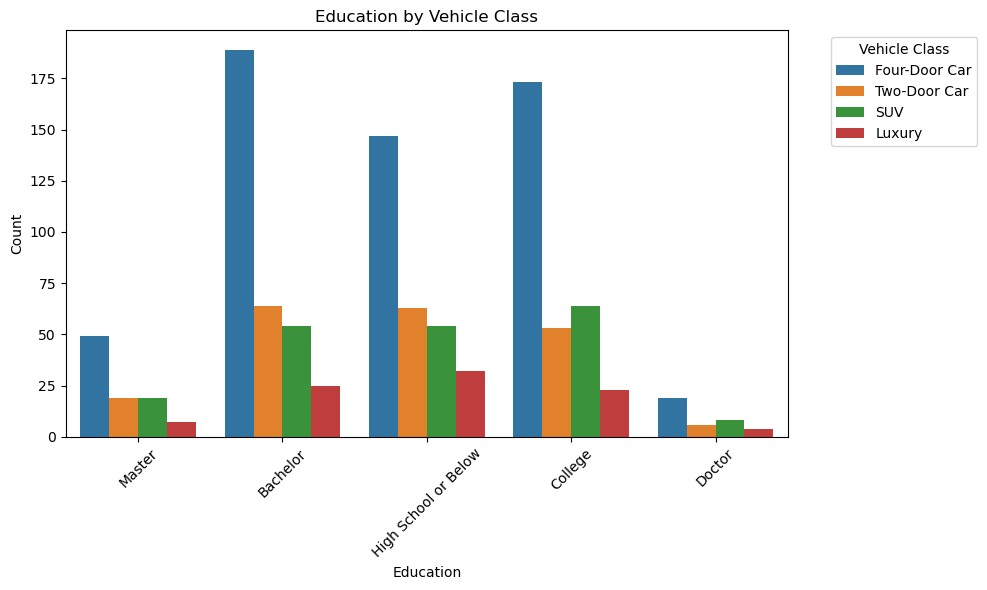

In [137]:
# Create the count plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.countplot(x="education", hue="vehicle_class", data=df)
plt.title('Education by Vehicle Class')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.legend(title='Vehicle Class', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

#the majority of individuals no mater their education level have four-door cars with the people who have a Bachelor degrees score 
# the highest at over 175 and people with a doctoral degree score the least at 20. While luxury cars are hard to get for all groups of 
# different educational levels.

In [ ]:
#What other plots do you feel would be beneficial?
# state vs total_claim_amount to see which states are complaining the most
# education vs income to see which groups make more income
# gender vs income to look at the income gap
# gender vs vehicle_class to see the gap 
# gender vs total_claim_amount to see which gender is complaining the most